# Lead Score Case Study

### Step 1: Importing the dataset

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and Numpy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


from sklearn.metrics import roc_curve, auc

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [3]:
# Importing all datasets

df1=pd.read_csv("Leads.csv")

### Step 2 : Inspecting the Dataframe

In [4]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# let's check the dimensions of the dataframe
df1.shape

(9240, 37)

In [6]:
# Let's check the count, mean, min max for the numeric vars
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Let's check the data type of the columns, 
#we will have to change the dtype of few of the columns too

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking the % of null vale in the data

(df1.isna().sum()/len(df1)).sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

**Note:** There are few columns at the top which have more than 30% missing values, it's better to drop these columns 

- Lead Quality                                     0.515909
- Asymmetrique Activity Index                      0.456494
- Asymmetrique Profile Score                       0.456494
- Asymmetrique Activity Score                      0.456494
- Asymmetrique Profile Index                       0.456494
- Tags                                             0.362879

In [9]:
# Checking for duplicate rows 
df1.duplicated().sum()

0

There are no duplicates in the dataframe

In [10]:
# checking the values of all categorical vars

cols = [ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 
       'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for col in cols:
    print(f"Value Counts for {col}:")
    print(df1[col].value_counts(dropna=False))
    print("-" * 40)




Value Counts for Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------
Value Counts for Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
----------------------------------------
Value Counts for Do Not Email:
No     8506
Yes     734
Name: D

There are a lot of yes no variables which we will have to convert it to binary in the data cleaning step.These below are the yes/no vars


- Do Not Email:
- Do Not Call
- Search
- Magazine:
- Newspaper Article:
- X Education Forums:
- Newspaper:
- Through Recommendations:
- Receive More Updates About Our Courses  # this has just no
- Update me on Supply Chain Content # this has just no
- Get updates on DM Content:     # this has just no
- Get updates on DM Content:  # this has just no
- A free copy of Mastering The Interview:


**Note** : As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.

# Step 3: Cleaning the dataframe

As we saw before the columns with select values, we will replace it with NaN.
Below are the columns with **Select** as values


- 'Specialization', 
- 'How did you hear about X Education',
- 'Lead Profile',
- 'City'


In [11]:
# Converting the select values as NaN 

df1=df1.replace('Select',np.nan)

In [12]:
# Calculating the missing value % again 

(100*df1.isna().sum()/len(df1)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Let's drop these columns which have missing data>40%

- How did you hear about X Education               0.784632
- Lead Profile                                     0.741883
- Lead Quality                                     0.515909
- Asymmetrique Profile Score                       0.456494
- Asymmetrique Activity Score                      0.456494
- Asymmetrique Activity Index                      0.456494
- Asymmetrique Profile Index                       0.456494

In [13]:
# Let's drop these columns 
drop_these=['How did you hear about X Education','Lead Profile','Lead Quality',
            'Asymmetrique Profile Score','Asymmetrique Activity Score',
            'Asymmetrique Activity Index','Asymmetrique Profile Index']

In [14]:
df1.drop(columns=drop_these, inplace=True)

In [15]:
#let's check the missing % again 

(100*df1.isna().sum()/len(df1)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Let's deal with categorical data


In [16]:
# selecting the columns with categorical data 
categorical_cols=df1.select_dtypes(include='object').columns.tolist()

In [17]:
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [18]:
column_list=["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

**Note** Approach will be to check the count of values in each categorical cols and then decide how to treat the missing value for that column

In [19]:
for col in column_list:
    print(f'Value counts for {col}:')
    print(100*df1[col].value_counts(normalize=True,dropna=False))
    print("-" * 40)

Value counts for City:
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64
----------------------------------------
Value counts for Specialization:
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management    

- City: City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

- Specialization: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

- Tags: Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

- What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

- What is your current occupation: We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

- Country: X Education sells online courses and appx 70% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.
    
- Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

- Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

    

#### Dropping the following columns

- City
- tags
- Country
- What matters most to you in choosing a course


In [20]:
# Dropping Columns

df1.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df1.shape)

After Drop (9240, 26)


#### Imputing the folowing columns

- Specialization
- Lead Source
- Last Activity
- What is your current occupation

In [21]:
# we will fill the missing values of these columns with these values as decided previously
missing_values={'Specialization':'Others',
                'Lead Source':'Google',
                'Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df1=df1.fillna(value=missing_values)

In [22]:
#checking the missing % again for remaining columns

(100*df1.isna().sum()/len(df1)).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Magazine                                    0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

####  Columns with numeircal data

In [23]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df1.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

Missing values in Total visits can be impiuted with mode

In [24]:
df1['TotalVisits'].fillna(df1['TotalVisits'].mode()[0],inplace=True)

In [25]:
# Page Views Per Visit  
print("Page Views Per Visit")
print("----------------------------------------")
df1['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit
----------------------------------------


0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

Missing Valumes in Page Views Per Visit can be imputed with mode

In [26]:
df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].mode()[0],inplace=True)

In [27]:
#checking the missing % again 

(100*df1.isna().sum()/len(df1)).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

All columns looks good :)

#### Let's remove unwanted columns

In [28]:

# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df1['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [29]:
#check for columns with one unique value, count and freq is same

df1.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


NOTE: Following columns have only one unique value:

- 'I agree to pay the amount through cheque',
- 'Get updates on DM Content',
- 'Update me on Supply Chain Content',
- 'Receive More Updates About Our Courses',
- 'Magazine'



These columns are of no use as they have only one category of response from customer and can be dropped:

In [30]:
cols_to_drop=['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

df1.drop(columns=cols_to_drop,axis=1,inplace=True)

In [31]:
df1.shape

(9240, 21)

#### Dropping columns of no use for modeling

*NOTE*: Columns such as:

- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'


Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe

In [32]:
df1.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [33]:
df1.shape

(9240, 18)

In [34]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df1.isna().mean(axis=1)).sort_values(ascending=False).head(10)


0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

No missing values in rows

#### Checking the categorical column skewness

In [35]:
# let's plot hostogram for catgorical columns
columns= df1.select_dtypes(include=['object']).columns.to_list()


In [36]:
columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

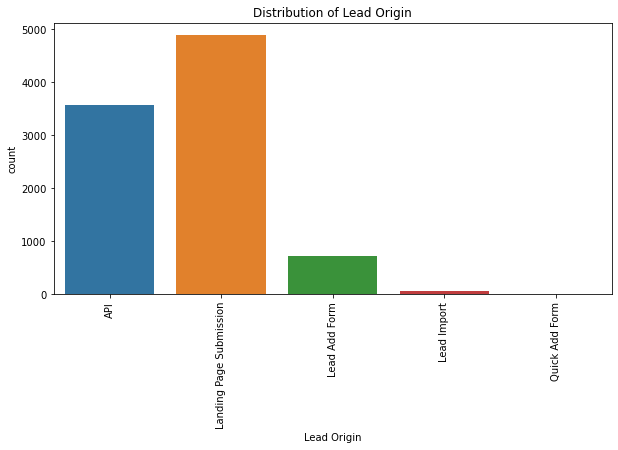

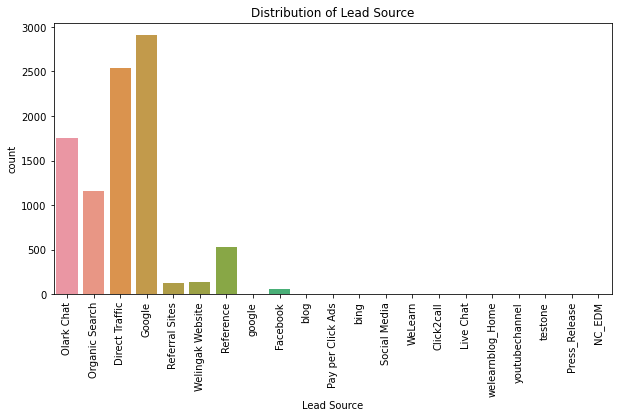

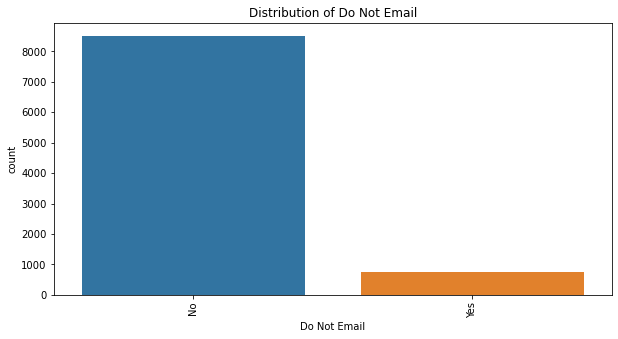

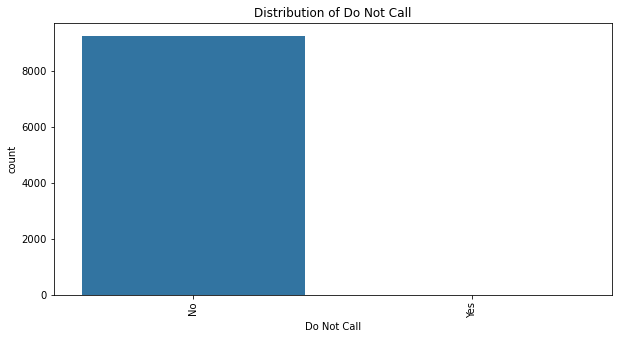

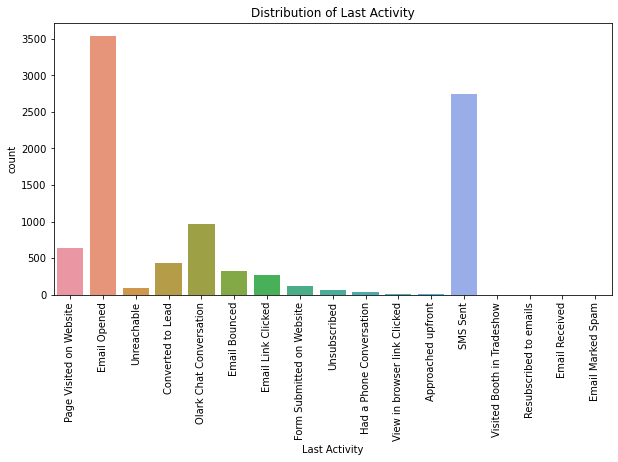

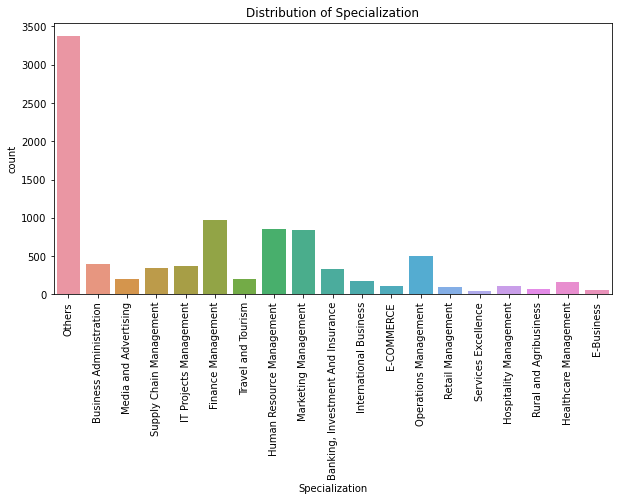

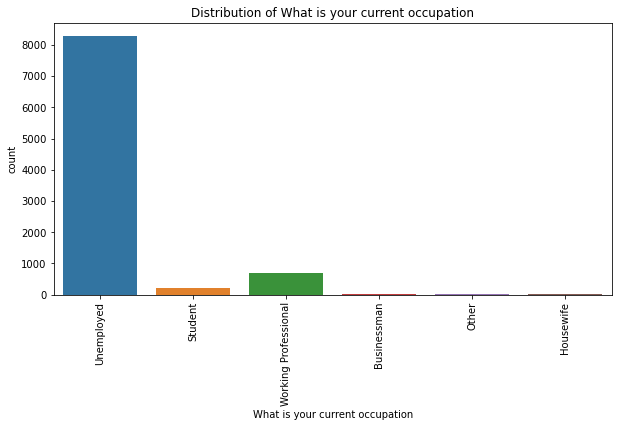

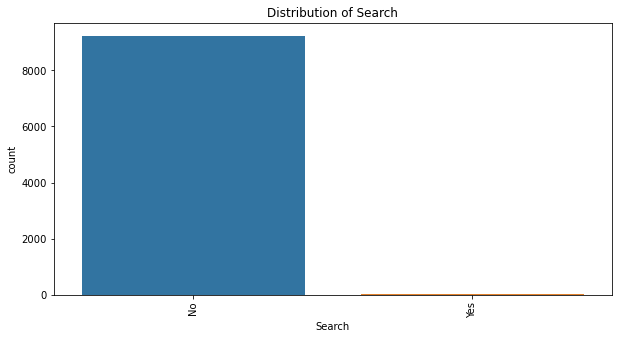

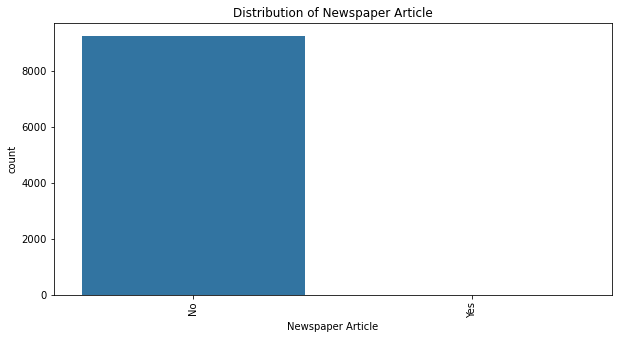

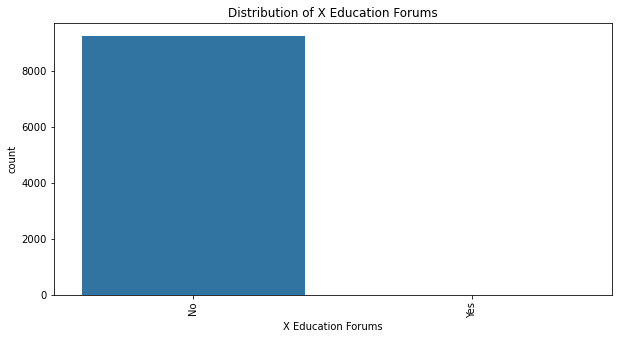

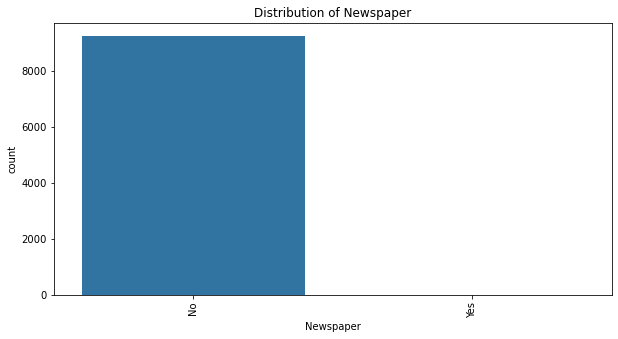

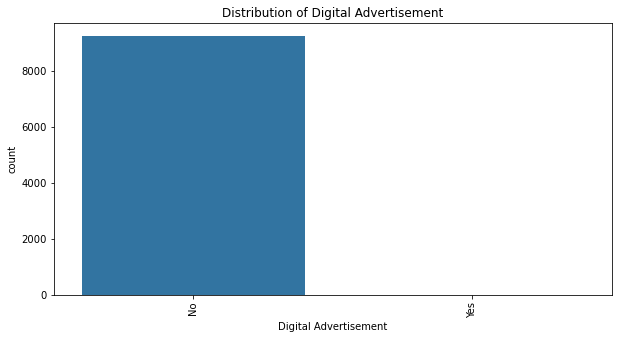

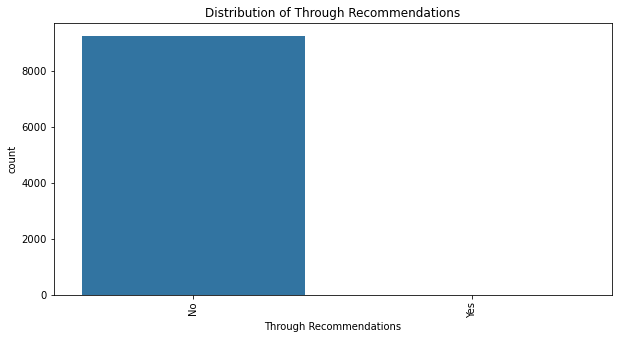

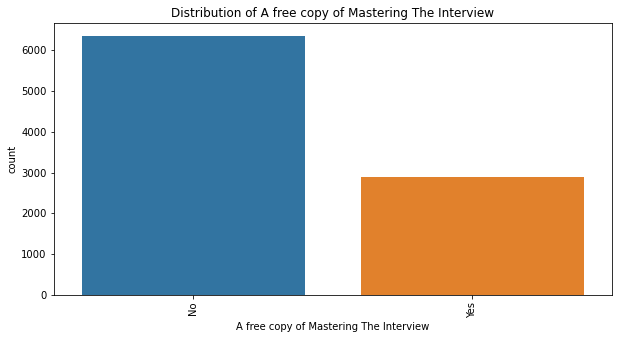

In [37]:

for col in columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df1[col])
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.title(f'Distribution of {col}')
    plt.show()


NOTE: Following columns have data which is highly skewed :

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.


mThese columns will be dropped as they will not add any value to the model. 

In [38]:
#dropping cat columns with skewed data

df1.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [39]:
df1.shape

(9240, 11)

#### Checking the numerical column skewness

In [40]:
num_cols=["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

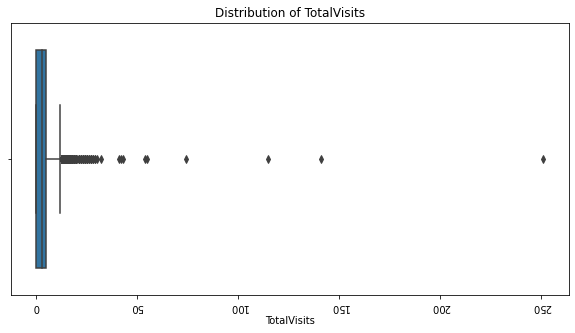

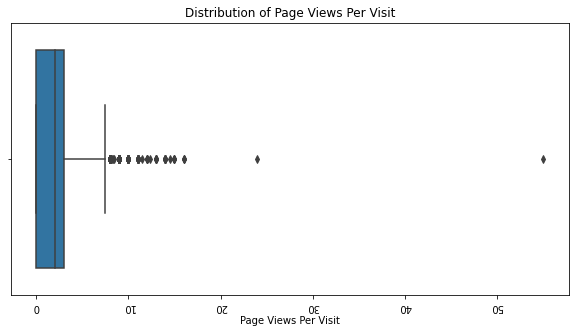

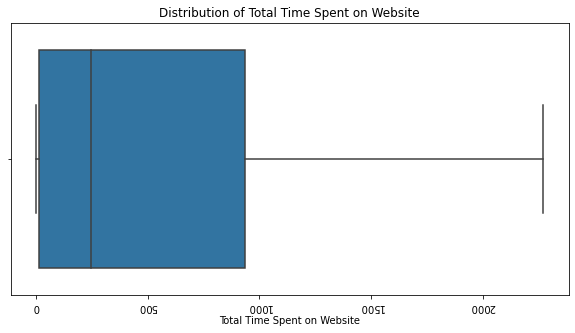

In [41]:

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1[col])
    plt.xticks(rotation=180)  # Rotate x-axis labels for readability
    plt.title(f'Distribution of {col}')
    plt.show()

Total visits and page viwes per visit has outliers as we can see. we will have to treat them

In [42]:

def treat_outliers(df1, columns):
    for col in columns:
        Q1 = df1[col].quantile(0.25)  # 25th percentile
        Q3 = df1[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap upper outliers and floor lower outliers
        df1[col] = np.clip(df1[col], lower_bound, upper_bound)

    return df1


In [43]:
df1 = treat_outliers(df1, num_cols)

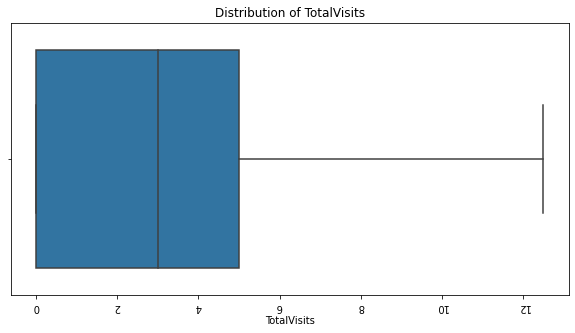

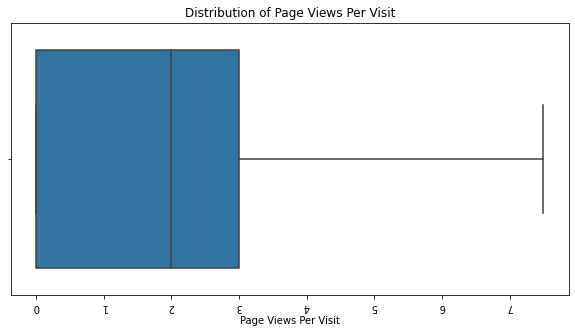

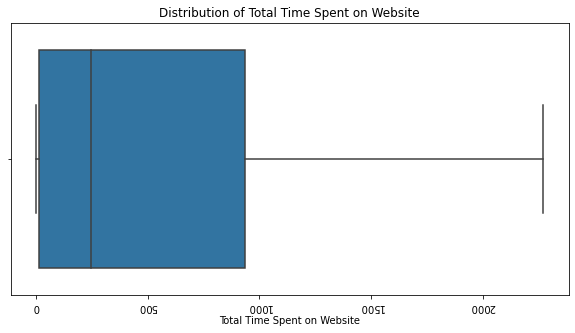

In [44]:
#Let's check the vars again 

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1[col])
    plt.xticks(rotation=180)  # Rotate x-axis labels for readability
    plt.title(f'Distribution of {col}')
    plt.show()

These look good :)

In [45]:
# Let's check the value counts fr categorical columns again 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]



In [46]:
for col in columnsList_cat:
    print(f'Value counts for {col}:')
    print(100*df1[col].value_counts(normalize=True,dropna=False))
    print("-" * 40)

Value counts for Lead Origin:
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
----------------------------------------
Value counts for Lead Source:
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: flo

There are some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, let's group these categories together under "Others". 

Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

In [47]:
#let's bin the low frequency value levels to others
df1['Lead Source'] = df1['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home"
                                                 
                                                 "WeLearn","blog","NC_EDM"],"Others")




df1['Last Activity'] = df1['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')                            

In [48]:
# Changing google to Google
df1['Lead Source'] = df1['Lead Source'].replace("google","Google")

In [49]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df1.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df1.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [50]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df1['Do Not Email'] = df1['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df1['Free_copy'] = df1['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

# Step 4: EDA 

[Text(0, 0, '61.46%'), Text(0, 0, '38.54%')]

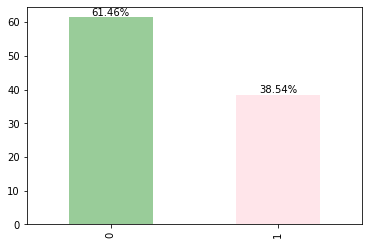

In [51]:
#Let's stat with our target var Converted

(100 * df1["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "pink"], alpha=0.4).bar_label(plt.gca().containers[0], fmt='%.2f%%')



Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
While 61.5% of the people didnt convert to leads. (Majority)
`m

In [52]:
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

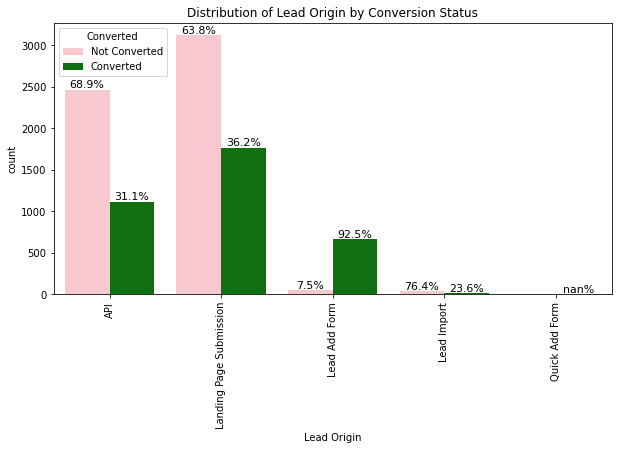

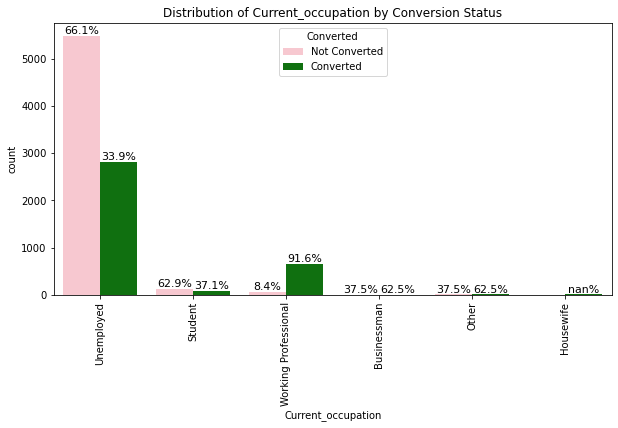

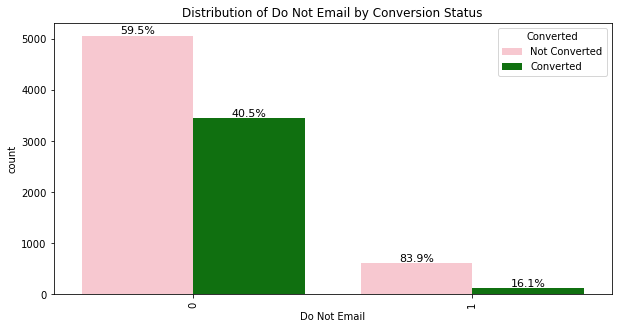

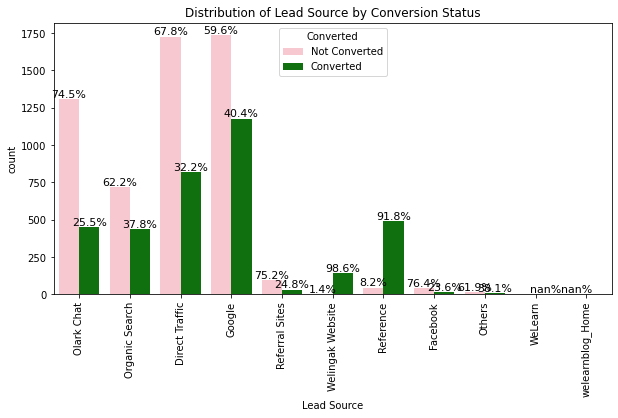

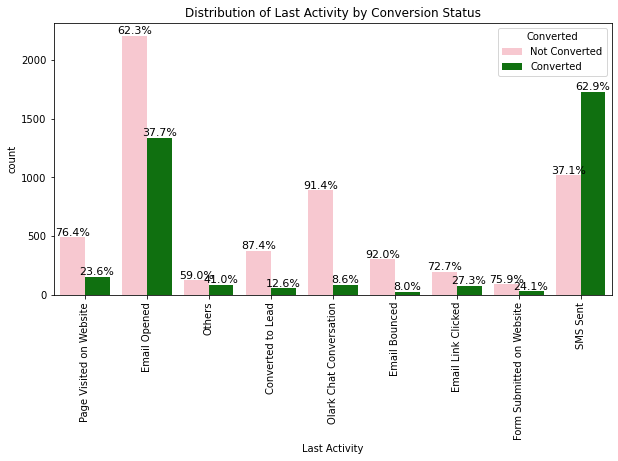

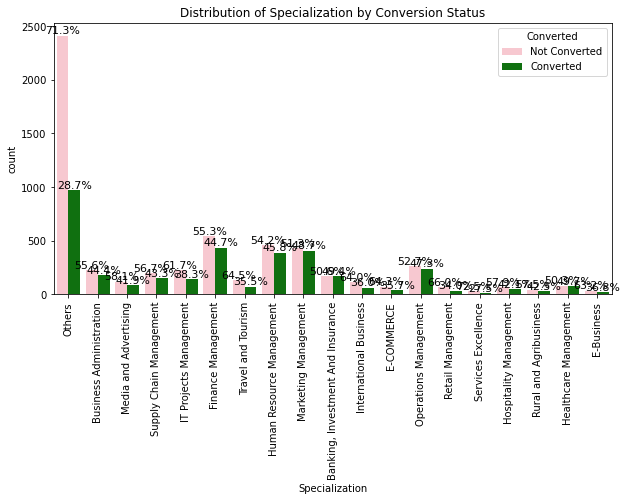

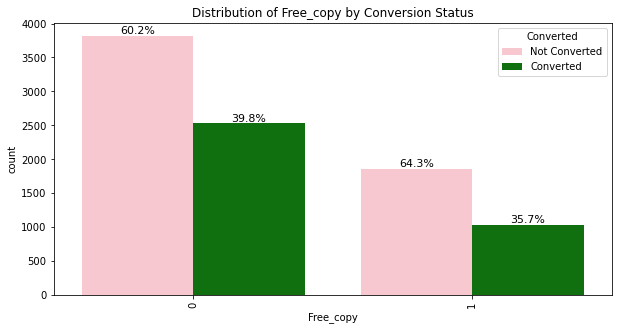

In [53]:
#Let's do bivariate analysis of cat columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=df1[col], hue=df1["Converted"], palette=["pink", "green"])  # Hue adds the 'Converted' category
    
    # Calculate the heights of the bars for each category
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    # Loop through each container (bar group) and annotate with percentage
    for bars in ax.containers:
        for i, p in enumerate(bars):
            # Calculate the total count for the current group
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'  # Calculate percentage
            
            # Annotate each bar with its percentage
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                        size=11, ha='center', va='bottom')
    
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.title(f'Distribution of {col} by Conversion Status')
    plt.legend(title="Converted", labels=["Not Converted", "Converted"])  # Add legend
    plt.show()


<Figure size 1152x288 with 0 Axes>

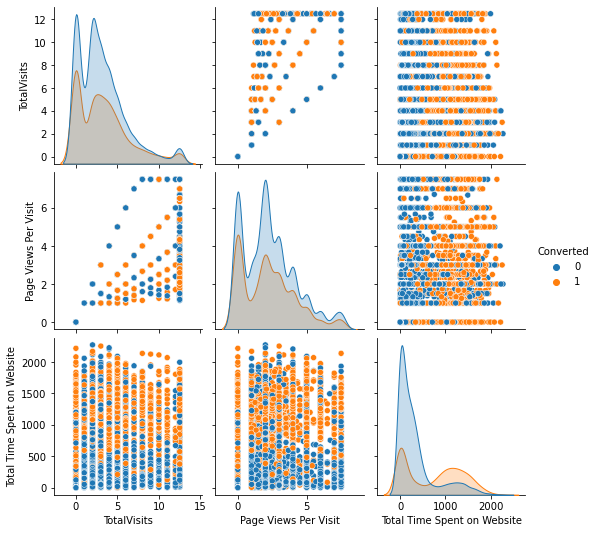

In [54]:
#Bivariate analysis of numericl col
plt.figure(figsize=(16, 4))
sns.pairplot(data=df1,vars=num_cols,hue="Converted")                                  
plt.show()

In [55]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

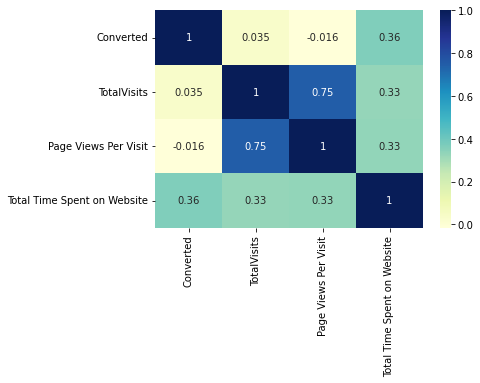

In [56]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df1[num_cols].corr(),cmap="YlGnBu",annot=True)
plt.show()

# Step 5: Data Preparation

In [57]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df1[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy], axis=1)

In [58]:
#let's drop the columns for which we have aleray created dummies
df1 = df1.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [59]:
df1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 6 : Train test split

In [60]:
# predictor variable
X = df1.drop('Converted', axis=1)

# Putting Target variables to y
y = df1["Converted"]

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 50)
(2772, 50)
(6468,)
(2772,)


In [63]:
X_test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
4269,0,8.0,1011,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,0,0.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7766,0,5.0,59,5.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9199,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,0.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,0,12.5,290,1.5,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2152,0,0.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7101,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5331,1,3.0,1608,3.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Step 7 : Feature Scaling

In [64]:
# Using standard scaler for scaling the features
scaler=StandardScaler()
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [65]:

# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


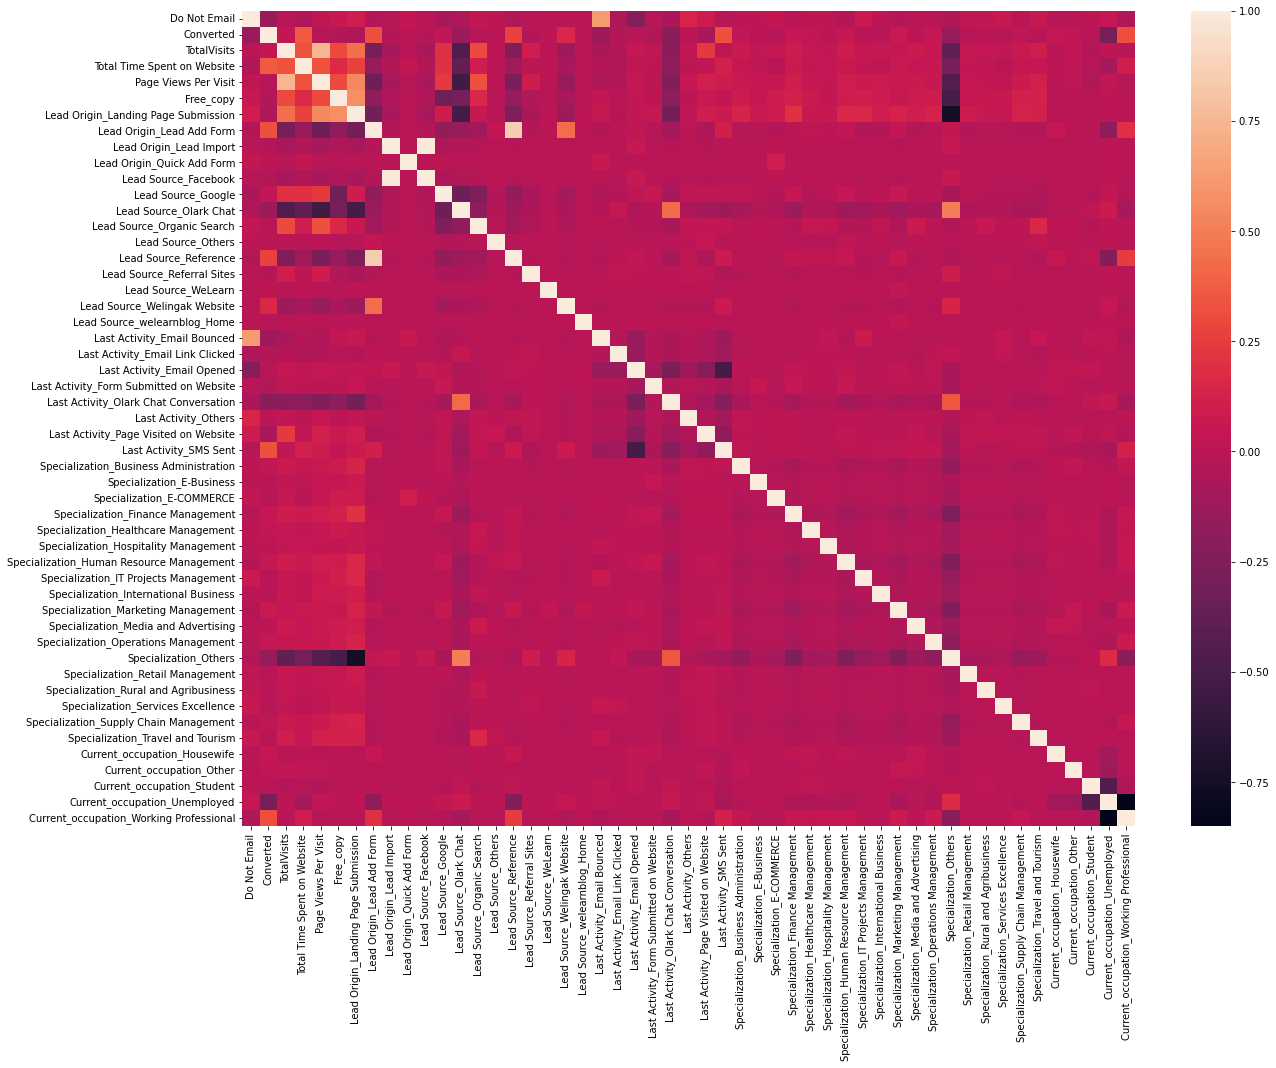

In [66]:
#Let's look at correlations
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr())
plt.show()

As the above hetmap has so  many columns , let's break it down the suspected vars which might be correlated

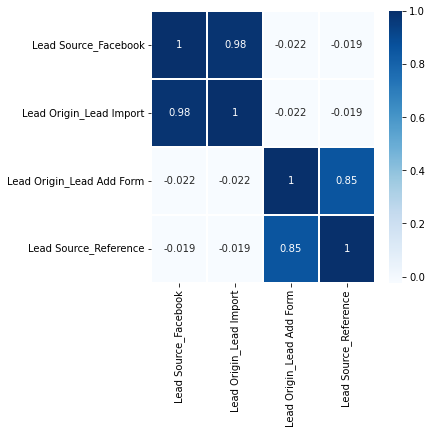

In [67]:

plt.figure(figsize = (5,5))        
sns.heatmap(df1[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [68]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

# Step 8 : Model Building

- we will build logistic reg for predicting categorical variable converted
- Fetaure selection using RFE
- Manual fine tunning using p values and VIFs

### Usinf RFE to select columns

In [69]:
# Let's use RFE to reduce variables
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [70]:
#Checking the output of RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 12),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_WeLearn', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_welearnblog_Home', False, 26),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('L

In [71]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
47,Current_occupation_Working Professional,True,1
22,Last Activity_Others,True,1
30,Specialization_Hospitality Management,True,1
19,Last Activity_Email Opened,True,1
37,Specialization_Others,True,1
15,Lead Source_Welingak Website,True,1
46,Current_occupation_Unemployed,True,1
11,Lead Source_Others,True,1
9,Lead Source_Olark Chat,True,1
12,Lead Source_Reference,True,1


In [72]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife', 'Current_occupation_Other',
       'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [73]:

# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn',
       'Lead Source_welearnblog_Home', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
 

In [74]:
# Calculating VIFs for vars
X = X_train.select_dtypes(include=['number'])

# Create a DataFrame for VIF
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Sort by VIF values in descending order
vif_df = vif_df.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Display VIF
print(vif_df)

                                     Feature        VIF
0              Current_occupation_Unemployed  57.885056
1                      Specialization_Others  14.460823
2                 Last Activity_Email Opened   9.961282
3        Lead Origin_Landing Page Submission   8.448708
4                     Last Activity_SMS Sent   8.110259
5    Current_occupation_Working Professional   5.812771
6                     Lead Source_Olark Chat   4.259402
7          Specialization_Finance Management   3.960716
8      Last Activity_Olark Chat Conversation   3.756890
9                         Lead Source_Google   3.670459
10       Specialization_Marketing Management   3.612828
11  Specialization_Human Resource Management   3.571188
12                      Page Views Per Visit   3.070250
13     Last Activity_Page Visited on Website   2.862427
14               Last Activity_Email Bounced   2.641362
15      Specialization_Operations Management   2.613700
16                               TotalVisits   2

### Model 1

In [75]:

# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -0.767845
Total Time Spent on Website                 1.056680
Lead Origin_Landing Page Submission        -1.246718
Lead Source_Olark Chat                      0.853523
Lead Source_Others                          1.018762
Lead Source_Reference                       2.921160
Lead Source_Welingak Website                5.452459
Last Activity_Email Opened                  1.095227
Last Activity_Others                        1.406914
Last Activity_SMS Sent                      2.218621
Specialization_Hospitality Management      -1.094685
Specialization_Others                      -1.206543
Current_occupation_Housewife               22.629057
Current_occupation_Other                   -0.508790
Current_occupation_Unemployed              -0.430080
Current_occupation_Working Professional     2.278419
dtype: float64

In [76]:
# Let's check summary

print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.7
Date:                Mon, 24 Feb 2025   Deviance:                       5473.5
Time:                        06:04:21   Pearson chi2:                 8.14e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Current_occupation_Housewife               23.0212   1.33e+04      0.002      0.999

**Note** This will be removed since its p value is 0.999 which is >0.05 for statistical significance

### Model 2

In [77]:
#dropiing the above column and re runningthe model
rfe_col=rfe_col.drop('Current_occupation_Housewife')

In [78]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -0.599138
Total Time Spent on Website                1.055966
Lead Origin_Landing Page Submission       -1.243216
Lead Source_Olark Chat                     0.849560
Lead Source_Others                         1.016994
Lead Source_Reference                      2.931182
Lead Source_Welingak Website               5.454968
Last Activity_Email Opened                 1.093986
Last Activity_Others                       1.401913
Last Activity_SMS Sent                     2.213895
Specialization_Hospitality Management     -1.102908
Specialization_Others                     -1.209941
Current_occupation_Other                  -0.678371
Current_occupation_Unemployed             -0.596496
Current_occupation_Working Professional    2.109393
dtype: float64

In [79]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.6
Date:                Mon, 24 Feb 2025   Deviance:                       5485.1
Time:                        06:04:21   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187

**Note** This will be remove as it has high p value of 0.187, also lead source ohers have have p value too, we will run and check if it still has high  value after remving lead source facebook

### Model 3

In [80]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -0.599138
Total Time Spent on Website                1.055966
Lead Origin_Landing Page Submission       -1.243216
Lead Source_Olark Chat                     0.849560
Lead Source_Others                         1.016994
Lead Source_Reference                      2.931182
Lead Source_Welingak Website               5.454968
Last Activity_Email Opened                 1.093986
Last Activity_Others                       1.401913
Last Activity_SMS Sent                     2.213895
Specialization_Hospitality Management     -1.102908
Specialization_Others                     -1.209941
Current_occupation_Other                  -0.678371
Current_occupation_Unemployed             -0.596496
Current_occupation_Working Professional    2.109393
dtype: float64

In [81]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.6
Date:                Mon, 24 Feb 2025   Deviance:                       5485.1
Time:                        06:04:21   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Lead Source_Others                          1.0059      0.543      1.854      0.064  

**Note** "Lead Source_Others" column will be removed from model due to high p-value of 0.064,

### Model 4

In [82]:
rfe_col=rfe_col.drop('Lead Source_Others')

In [83]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.584023
Total Time Spent on Website                1.053762
Lead Origin_Landing Page Submission       -1.254220
Lead Source_Olark Chat                     0.839607
Lead Source_Reference                      2.918945
Lead Source_Welingak Website               5.446239
Last Activity_Email Opened                 1.090909
Last Activity_Others                       1.405953
Last Activity_SMS Sent                     2.209520
Specialization_Hospitality Management     -1.106461
Specialization_Others                     -1.219327
Current_occupation_Other                  -0.681374
Current_occupation_Unemployed             -0.592818
Current_occupation_Working Professional    2.107402
dtype: float64

In [84]:
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.2
Date:                Mon, 24 Feb 2025   Deviance:                       5488.4
Time:                        06:04:21   Pearson chi2:                 8.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 4 looks stable :)

# Step 9 : Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [85]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.455296
6795    0.072195
3516    0.232501
8105    0.771548
3934    0.198035
4844    0.988362
3297    0.108203
8071    0.996215
987     0.147076
7423    0.869214
dtype: float64

In [86]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4552961 , 0.07219472, 0.23250124, 0.77154846, 0.19803489,
       0.98836166, 0.10820284, 0.99621454, 0.14707594, 0.86921448])

In [87]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.455296,1871
1,0,0.072195,6795
2,0,0.232501,3516
3,0,0.771548,8105
4,0,0.198035,3934


In [88]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.455296,1871,0
1,0,0.072195,6795,0
2,0,0.232501,3516,0
3,0,0.771548,8105,1
4,0,0.198035,3934,0


#### COnfusion Matrix

In [89]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3589  413]
 [ 844 1622]]


In [90]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       [3589  413]
 # converted         [ 844 1622]]


# Above is the confusion matrix when we use threshold of probability as 0.5

#### Accuracy

In [91]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8056586270871985


#### Metrcis beyond accuracy


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6577453365774534


In [94]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8968015992003998


In [95]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1031984007996002


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.797051597051597


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.809609745093616


### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in     sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of    the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the      less accurate the test.

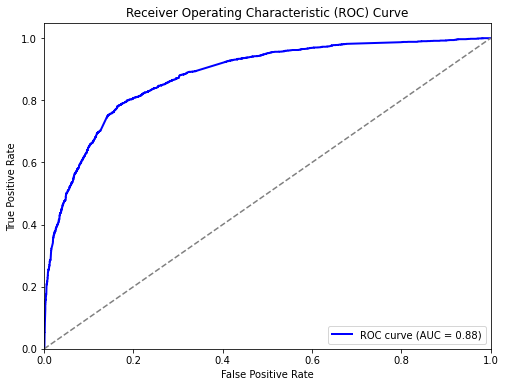

In [98]:

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


OTE: Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### Finding Optimal Cutoff Point/ Probability

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.455296,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.072195,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.232501,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.771548,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.198035,3934,0,1,1,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [101]:
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.597248  0.973236  0.365567
0.2   0.2  0.750000  0.893755  0.661419
0.3   0.3  0.788961  0.831711  0.762619
0.4   0.4  0.812925  0.762368  0.844078
0.5   0.5  0.805659  0.657745  0.896802
0.6   0.6  0.794836  0.588808  0.921789
0.7   0.7  0.780303  0.510949  0.946277
0.8   0.8  0.754329  0.408354  0.967516
0.9   0.9  0.708720  0.251014  0.990755


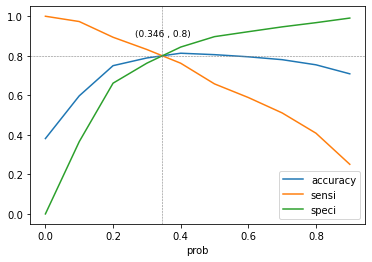

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

NOTE: 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our Optimal cutoff point for probability threshold .

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.346 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.455296,1871,1
1,0,0.072195,6795,0
2,0,0.232501,3516,0
3,0,0.771548,8105,1
4,0,0.198035,3934,0


In [104]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8064316635745207


In [124]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [106]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")




************************************************** 

Confusion Matrix
[[3236  766]
 [ 486 1980]] 

True Negative                    :  3236
True Positive                    :  1980
False Negative                   :  486
False Positve                    :  766
Model Accuracy                   :  0.8064
Model Sensitivity                :  0.8029
Model Specificity                :  0.8086
Model Precision                  :  0.721
Model Recall                     :  0.8029
Model True Positive Rate (TPR)   :  0.8029
Model False Positive Rate (FPR)  :  0.1914


************************************************** 



#### Precision and recall tradeoff
Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [107]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

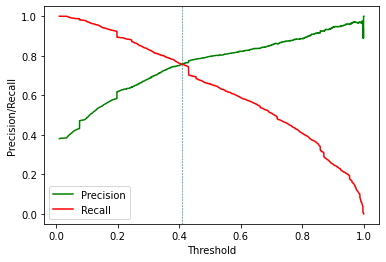

In [108]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

NOTE: The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [109]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [110]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.455296,1871,1,1
1,0,0.072195,6795,0,0
2,0,0.232501,3516,0,0
3,0,0.771548,8105,1,1
4,0,0.198035,3934,0,0


In [111]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3408  594]
 [ 598 1868]] 

************************************************** 

True Negative                    :  3408
True Positive                    :  1868
False Negative                   :  598
False Positve                    :  594
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7575
Model Specificity                :  0.8516
Model Precision                  :  0.7587
Model Recall                     :  0.7575
Model True Positive Rate (TPR)   :  0.7575
Model False Positive Rate (FPR)  :  0.1484


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score Feature to Training dataframe

- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [112]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.455296,1871,1,46
1,0,0.072195,6795,0,7
2,0,0.232501,3516,0,23
3,0,0.771548,8105,1,77
4,0,0.198035,3934,0,20


# Step 10: Making predictions on test set

#### predictions on test dataset using final model

In [113]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Other,Current_occupation_Unemployed,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,1,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,1,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,1,0,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,0,0,1,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,1,0


In [114]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [115]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [116]:
# top 10 columns
y_test_pred[:10]

4269    0.696294
2376    0.858067
7766    0.891883
9199    0.076595
4359    0.869897
9186    0.506374
1631    0.420691
8963    0.151679
8007    0.062929
5324    0.300270
dtype: float64

In [117]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.696294
2376,0.858067
7766,0.891883
9199,0.076595
4359,0.869897


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [119]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.696294
1,1,2376,0.858067
2,1,7766,0.891883
3,0,9199,0.076595
4,1,4359,0.869897


In [120]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.696294
1,2376,1,0.858067
2,7766,1,0.891883
3,9199,0,0.076595
4,4359,1,0.869897


In [122]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()


,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.696294,1
1,2376,1,0.858067,1
2,7766,1,0.891883,1
3,9199,0,0.076595,0
4,4359,1,0.869897,1


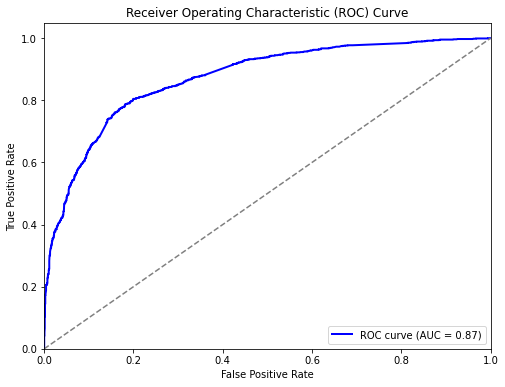

In [126]:
# Drawing ROC curve for Test Set

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


NOTE:

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

####  Test set model evaluation

In [127]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1351  326]
 [ 222  873]] 

************************************************** 

True Negative                    :  1351
True Positive                    :  873
False Negative                   :  222
False Positve                    :  326
Model Accuracy                   :  0.8023
Model Sensitivity                :  0.7973
Model Specificity                :  0.8056
Model Precision                  :  0.7281
Model Recall                     :  0.7973
Model True Positive Rate (TPR)   :  0.7973
Model False Positive Rate (FPR)  :  0.1944


************************************************** 



NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set
- Accuracy : 80.23%
- Sensitivity : 79.73% ≈ 80%
- Specificity : 80.56%
These matrics are very close to train set, so out final model logm4 is performing with good consistency on both Train & Test set

In [128]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.446239
Lead Source_Reference                      2.918945
Last Activity_SMS Sent                     2.209520
Current_occupation_Working Professional    2.107402
Last Activity_Others                       1.405953
Last Activity_Email Opened                 1.090909
Total Time Spent on Website                1.053762
Lead Source_Olark Chat                     0.839607
const                                     -0.584023
Current_occupation_Unemployed             -0.592818
Current_occupation_Other                  -0.681374
Specialization_Hospitality Management     -1.106461
Specialization_Others                     -1.219327
Lead Origin_Landing Page Submission       -1.254220
dtype: float64

NOTE: A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.m

Adding Lead Score Feature to Test dataframe

- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [130]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.696294,1,70
1,2376,1,0.858067,1,86
2,7766,1,0.891883,1,89
3,9199,0,0.076595,0,8
4,4359,1,0.869897,1,87


Train Data Set:
- Accuracy: 81.57%

- Sensitivity: 75.75%

- Specificity: 85.16%

Test Data Set:
- Accuracy: 80.23%

- Sensitivity: 79.73% ≈ 80%

- Specificity: 80.56%

NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a sensitivity of 81.57% in the train set and 79.73% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- The CEO of X Education had set a target sensitivity of around 80%.
- The model also achieved an accuracy of 80.23%, which is in line with the study's objectives.

#   Recommendations

To increase our Lead Conversion Rates:
- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.
- To identify areas of improvement:
- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvemen

******** Thank you ********